# MOVIE DATA ANALYSIS

## Business Understanding
 - The Goal is to understand what key factors contribute to
 the financial success of movies.
 - Determine the studios that produce the highest grossing movies.
 - Analyze movie trends in revenues over the years.
 - Provide insights for potential market strategies.

## Data Understanding
Overview:
This dataset contains information about movies, including title, studio, domestic gross, foreign gross and year of movie release.
- Loading the Data:


In [103]:
# import the relevant or required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [104]:
# creating the dataframe
df = pd.read_csv('bom.movie_gross.csv')
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [105]:
df.tail(30)

,title,studio,domestic_gross,foreign_gross,year
3357,I Am Not a Witch,FM,50900.0,NaN,2018
3358,Racer & the Jailbird,Super,46300.0,NaN,2018
3359,Rodin,Cohen,44300.0,NaN,2018
3360,What Will People Say,KL,44200.0,NaN,2018
3361,A Ciambra,IFC,41900.0,NaN,2018
3362,Oolong Courtyard,CL,37700.0,NaN,2018
3363,Girls vs Gangsters,WGUSA,37100.0,NaN,2018
3364,"No Date, No Signature",Distrib.,36400.0,NaN,2018
3365,The Apparition (2018),MBox,28300.0,NaN,2018
3366,The Charmer,FM,26200.0,NaN,2018


In [106]:
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

Discrete variables are usually of the int type, continuous variables are usually of the float type, and categorical variables are usually of the object type when they're stored in pandas. However, discrete variables can also be cast as floats, while numerical variables can be cast as objects. Therefore, to correctly identify variable types, we need to look at the data type and inspect their values as well

## Data Preparation
- Removing Duplicates
- Handling missing values 
- Finding Outliers

In [107]:
# removing duplicates
df.drop_duplicates()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [108]:
# Identify the missing values
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [109]:
# Convert the columns to numeric
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

#Fill missing values in 'domestic_gross' with the mean
df['domestic_gross'].fillna(df['domestic_gross'].mean(), inplace=True)

#Fill missing values in 'foreign_gross' with the mean
df['foreign_gross'].fillna(df['foreign_gross'].mean(), inplace=True)

#Fill missing values in 'studio' with the mode
df['studio'].fillna(df['studio'].mode()[0], inplace=True)
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.505704e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.505704e+07,2018
3384,El Pacto,Sony,2500.0,7.505704e+07,2018
3385,The Swan,Synergetic,2400.0,7.505704e+07,2018


In [110]:
#Finding outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_domestic = df['domestic_gross'].quantile(0.25)
Q3_domestic = df['domestic_gross'].quantile(0.75)
IQR_domestic = Q3_domestic - Q1_domestic

Q1_foreign = df['foreign_gross'].quantile(0.25)
Q3_foreign = df['foreign_gross'].quantile(0.75)
IQR_foreign = Q3_foreign - Q1_foreign

# Determine the lower and upper bounds for domestic_gross
lower_bound_domestic = Q1_domestic - 1.5 * IQR_domestic
upper_bound_domestic = Q3_domestic + 1.5 * IQR_domestic

# Determine the lower and upper bounds for foreign_gross
lower_bound_foreign = Q1_foreign - 1.5 * IQR_foreign
upper_bound_foreign = Q3_foreign + 1.5 * IQR_foreign

# Identify outliers in domestic_gross
outliers_domestic = df[(df['domestic_gross'] < lower_bound_domestic) | (df['domestic_gross'] > upper_bound_domestic)]

# Identify outliers in foreign_gross
outliers_foreign = df[(df['foreign_gross'] < lower_bound_foreign) | (df['foreign_gross'] > upper_bound_foreign)]

outliers_domestic
outliers_foreign

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3110,Skyscraper,Uni.,68400000.0,236400000.0,2018
3112,Pacific Rim Uprising,Uni.,59900000.0,231100000.0,2018
3113,Maze Runner: The Death Cure,Fox,58000000.0,230200000.0,2018
3114,Tomb Raider,WB,58300000.0,216400000.0,2018


In [111]:
#Remove outliers from domestic_gross and foreign_gross
df_cleaned = df[~((df['domestic_gross'] < lower_bound_domestic) | (df['domestic_gross'] > upper_bound_domestic) | 
                  (df['foreign_gross'] < lower_bound_foreign) | (df['foreign_gross'] > upper_bound_foreign))]
df_cleaned

,title,studio,domestic_gross,foreign_gross,year
34,The Sorcerer's Apprentice,BV,63200000.0,1.521000e+08,2010
44,Step Up 3-D,BV,42400000.0,1.169000e+08,2010
48,Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,8.440000e+07,2010
49,The Wolfman,Uni.,62000000.0,7.780000e+07,2010
50,The Bounty Hunter,Sony,67099999.0,6.930000e+07,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.505704e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.505704e+07,2018
3384,El Pacto,Sony,2500.0,7.505704e+07,2018
3385,The Swan,Synergetic,2400.0,7.505704e+07,2018


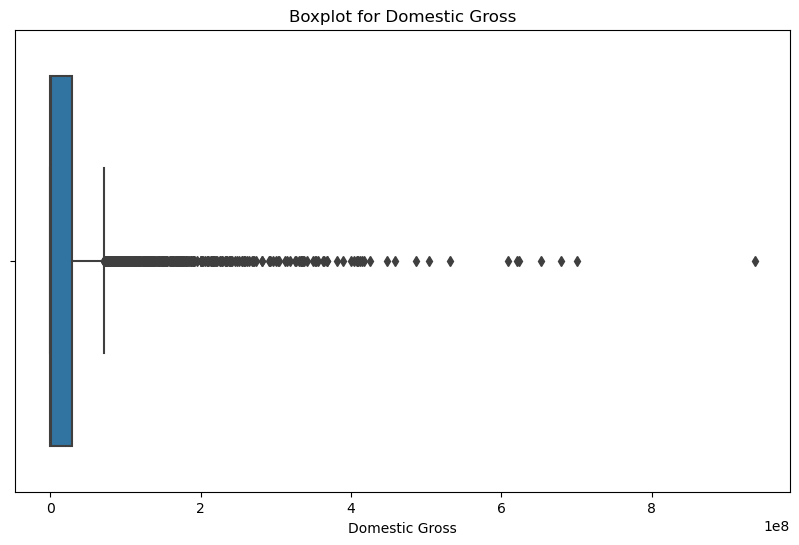

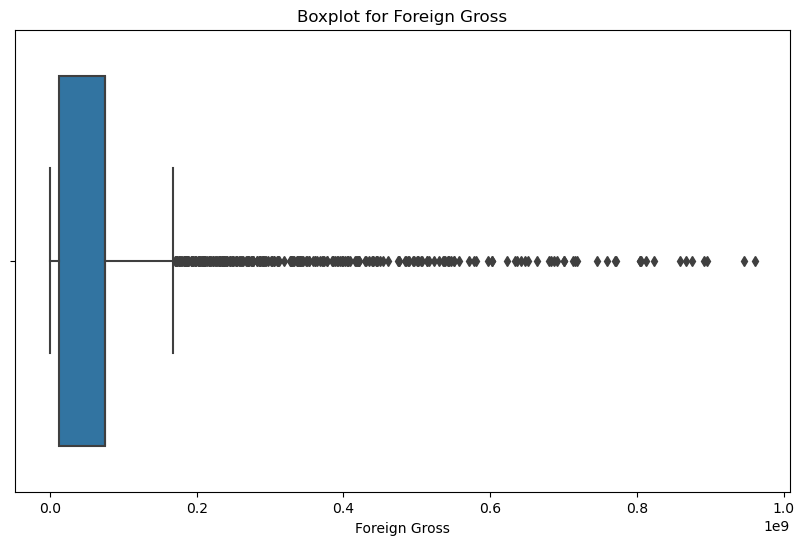

In [112]:
# Boxplot for domestic_gross
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['domestic_gross'])
plt.title('Boxplot for Domestic Gross')
plt.xlabel('Domestic Gross')
plt.show()

# Boxplot for foreign_gross
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['foreign_gross'])
plt.title('Boxplot for Foreign Gross')
plt.xlabel('Foreign Gross')
plt.show()

## Data Analysis
Perform Exploratory Data Analysis to uncover insights

In [113]:
# find the rows and columns of the data set
df.shape

(3387, 5)

In [114]:
# Find the summary of the DataFrame's structure and information
df.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [115]:
#Find the Summary Statistics
df.describe()

,domestic_gross,foreign_gross,year
count,3.387000e+03,3.387000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.670497e+07,1.065140e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.225000e+05,1.175000e+07,2012.000000
50%,1.400000e+06,7.505704e+07,2014.000000
75%,2.874585e+07,7.505704e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [116]:
df.columns.to_list()

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

In [117]:
# Calculate the correlation between domestic and foreign gross
correlation = df[['domestic_gross', 'foreign_gross']].corr()
correlation

,domestic_gross,foreign_gross
domestic_gross,1.000000,0.731948
foreign_gross,0.731948,1.000000


- Interpretation of the Correlation 
1. Correlation between domestic_gross and foreign_gross: The correlation coefficient is 0.731948. This indicates a strong positive correlation between domestic and foreign gross revenues. As the domestic gross revenue of a movie increases, its foreign gross revenue also tends to increase, and vice versa.

2. Correlation of domestic_gross with itself: As expected, the correlation coefficient is 1.000000, indicating a perfect positive correlation.

3. Correlation of foreign_gross with itself: Similarly, the correlation coefficient is 1.000000, indicating a perfect positive correlation.

## Visualization
### Revenue Distribution
Analyze the distribution of domestic and foreign gross revenues to understand the general performance of movies in different markets

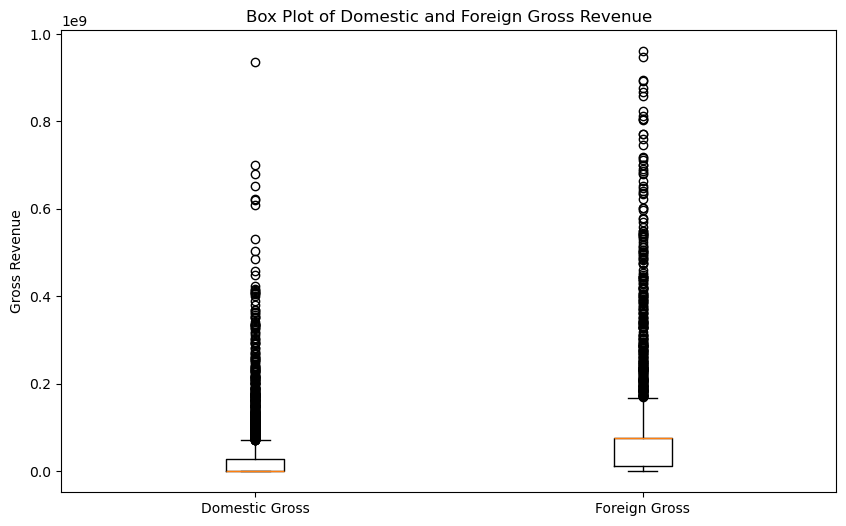

In [118]:
# Plot box plots for domestic and foreign gross revenue
plt.figure(figsize=(10, 6))

plt.boxplot([df['domestic_gross'], df['foreign_gross']], labels=['Domestic Gross', 'Foreign Gross'])
plt.title('Box Plot of Domestic and Foreign Gross Revenue')
plt.ylabel('Gross Revenue')

plt.show()

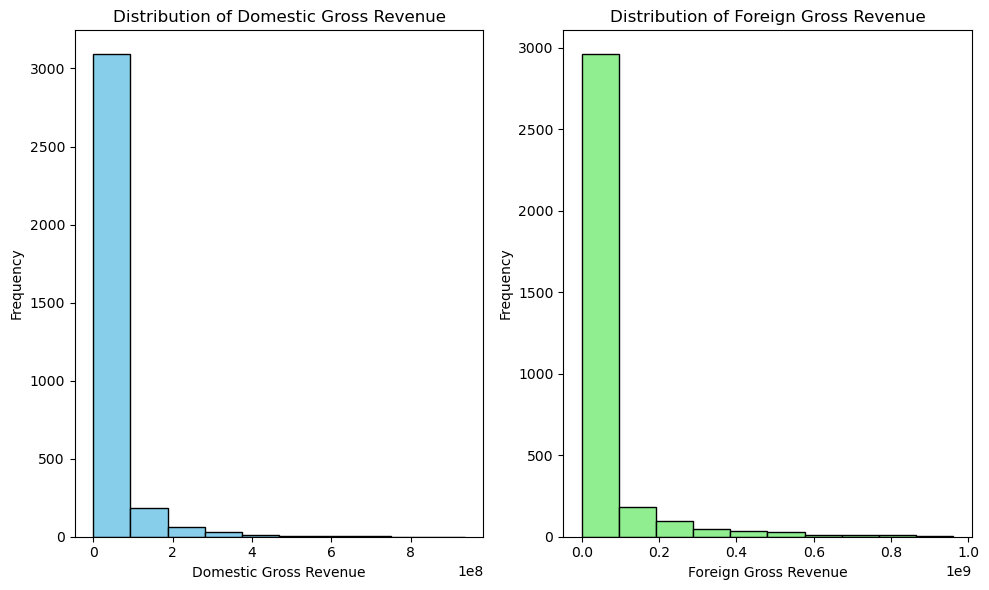

In [119]:
# Plot histograms for domestic and foreign gross revenue
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['domestic_gross'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Domestic Gross Revenue')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['foreign_gross'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Foreign Gross Revenue')
plt.xlabel('Foreign Gross Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- Observation of the visualization:
1. Both domestic and foreign gross revenue distributions are right skewed.
2. Most movies earn a relatively low gross revenue while a small number earn very high gross revenues.
3. The domestic gross revenue shows that most movies earn less than 200 million dollars. The foreign gross revenue shows that most movies earn less than 400 million dollars.This suggests that most movies earn more in foreign markets than domestic market.
4. There are few movies with high gross revenues shown by the outliers on the right side of both histograms which contributes significantly to the total revenue.


### Correlation Analysis
Identify the relationship between domestic and foreign gross revenues

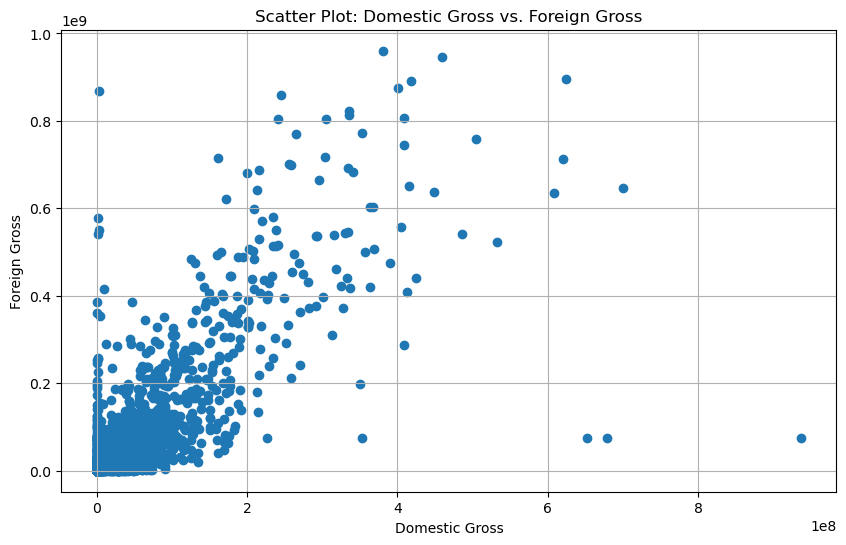

In [120]:
# Scatter plot for Domestic Gross vs. Foreign Gross
plt.figure(figsize=(10, 6))
plt.scatter(df['domestic_gross'], df['foreign_gross'])
plt.title('Scatter Plot: Domestic Gross vs. Foreign Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.grid(True)
plt.show()

- Observations of the Visualization:
1. There is a positive correlation between domestic and forign gross revenues meaning movies that perform well domestically tend to also perform well in foreign markets.
2. A majority of the movies cluster in the lower range of both domestic and foreign revenues with few movies in the higher range.
3. There are several outliers with high revenues in both revenues that earn more than the average. 

### Studio Analysis
Identify the studio that produces highest grossing movies

In [121]:
# Group by studio and calculate total gross revenue
studio_gross = df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()
studio_gross['total_gross'] = studio_gross['domestic_gross'] + studio_gross['foreign_gross']

# Find studio with highest total gross revenue
highest_grossing_studios = studio_gross.sort_values(by='total_gross', ascending=False).head(10)
highest_grossing_studios

,domestic_gross,foreign_gross,total_gross
studio,,,
BV,1.841903e+10,2.609408e+10,4.451311e+10
WB,1.216805e+10,1.941847e+10,3.158652e+10
Fox,1.094950e+10,2.020598e+10,3.115548e+10
Uni.,1.290239e+10,1.730511e+10,3.020750e+10
Sony,8.488429e+09,1.424558e+10,2.273401e+10
Par.,7.685871e+09,1.238878e+10,2.007465e+10
WB (NL),3.995700e+09,6.414057e+09,1.040976e+10
LGF,4.147709e+09,5.608475e+09,9.756184e+09
IFC,1.703292e+08,7.961977e+09,8.132306e+09


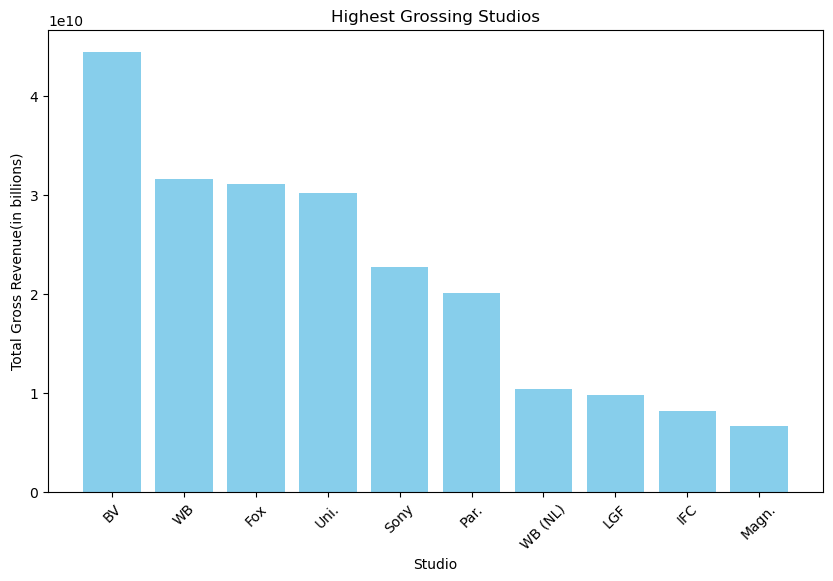

In [122]:
# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(highest_grossing_studios.index, highest_grossing_studios['total_gross'], color='skyblue')
plt.title('Highest Grossing Studios')
plt.xlabel('Studio')
plt.ylabel('Total Gross Revenue(in billions)')
plt.xticks(rotation=45)
plt.show()

- Interpretation of the Visualization:
1. Buena Vista(BV) and Warner Bros(WB) are the leading top studios in terms of gross revenues indicating a strong portfolio of successful movies.
2. There is a gap between the highest grossing studios and those on the lower end suggesting a concentration of market power among few studios.
3. Successful studios tend to perform well in both domestic and international markets.

### Trend Analysis
Analyze trends in movie revenues over the years.

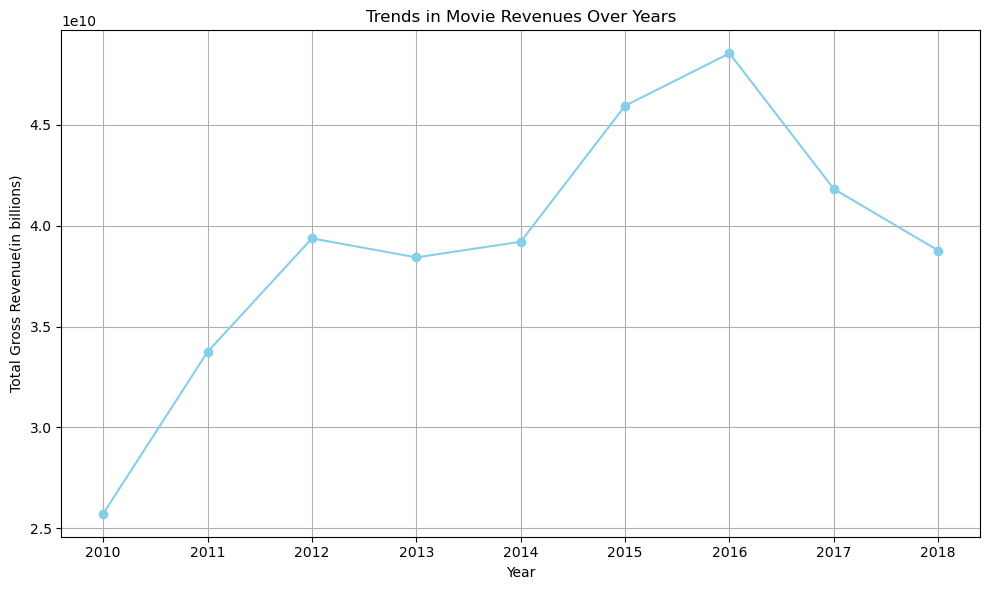

In [123]:
# Group by year and calculate total gross revenue
yearly_gross = df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()
yearly_gross['total_gross'] = yearly_gross['domestic_gross'] + yearly_gross['foreign_gross']

# Plot line chart for total gross revenue over years
plt.figure(figsize=(10, 6))
plt.plot(yearly_gross.index, yearly_gross['total_gross'], marker='o', color='skyblue', linestyle='-')
plt.title('Trends in Movie Revenues Over Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue(in billions)')
plt.grid(True)
plt.xticks(yearly_gross.index)
plt.tight_layout()
plt.show()

- Interpretation of Visualization.
1. There is a clear increase in total gross revenue from 2010 to 2016 indication growth during that period.
2. The highest total gross revenue was 2016 showing that was a successful year in the movie industry.
3. There is a noticeable decrease in total gross revenue from 2016 going forward with a significant drop in 2017 to 2018 indicating a downward trend in growth in the last years of the dataset.